# 💼 FinTech Case Study: Data Storytelling with Seaborn

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

n = 500
df = pd.DataFrame({
    "user_id": np.arange(1, n+1),
    "age": np.random.randint(18, 65, size=n),  # Continuous
    "gender": np.random.choice(["Male", "Female", "Other"], size=n),  # Nominal
    "subscription_type": np.random.choice(["Free", "Basic", "Premium"], size=n, p=[0.4, 0.4, 0.2]),  # Ordinal
    "monthly_txn_count": np.random.poisson(lam=8, size=n),  # Discrete
    "avg_txn_value": np.round(np.random.normal(loc=1200, scale=300, size=n), 2),  # Continuous
    "region": np.random.choice(["North", "South", "East", "West"], size=n),  # Nominal
    "active_days": np.random.randint(5, 30, size=n),  # Discrete
    "churned": np.random.choice(["Yes", "No"], size=n, p=[0.2, 0.8])  # Nominal
})

In [55]:
sns.set(style="whitegrid", context="notebook")
plt.figure(figsize=(15, 15))

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

In [9]:
sns.set_style("darkgrid")
sns.set_context("talk")
sns.set_palette("muted")

<Axes: xlabel='avg_txn_value', ylabel='Count'>

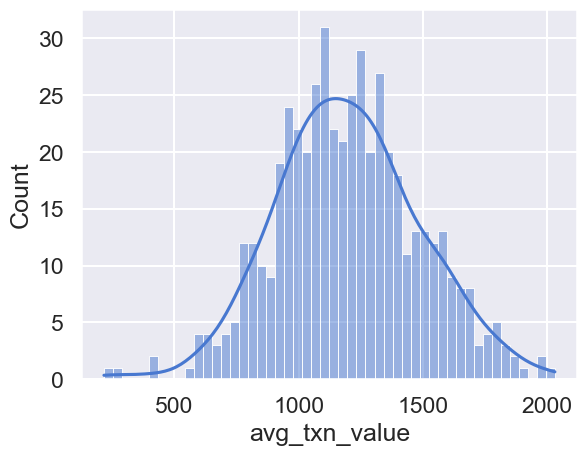

In [20]:
sns.histplot(df["avg_txn_value"], kde=True, bins=50)

<Axes: xlabel='subscription_type', ylabel='count'>

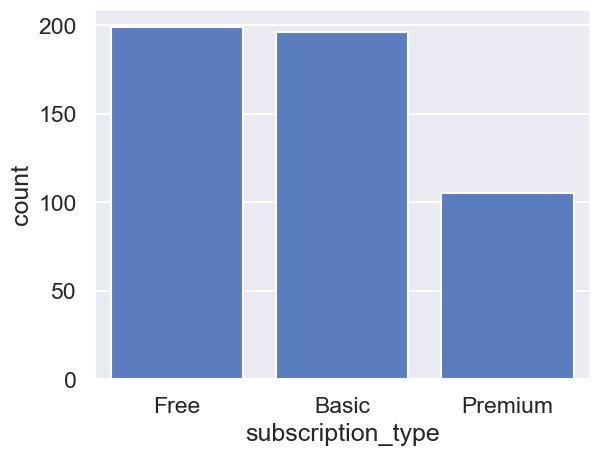

In [21]:
sns.countplot(x="subscription_type", data=df, order=["Free", "Basic", "Premium"])

<Axes: xlabel='region', ylabel='count'>

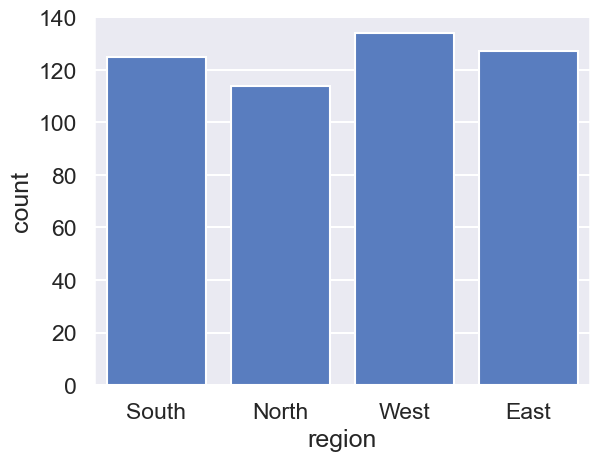

In [22]:
sns.countplot(x="region", data=df)

<Axes: xlabel='monthly_txn_count', ylabel='Count'>

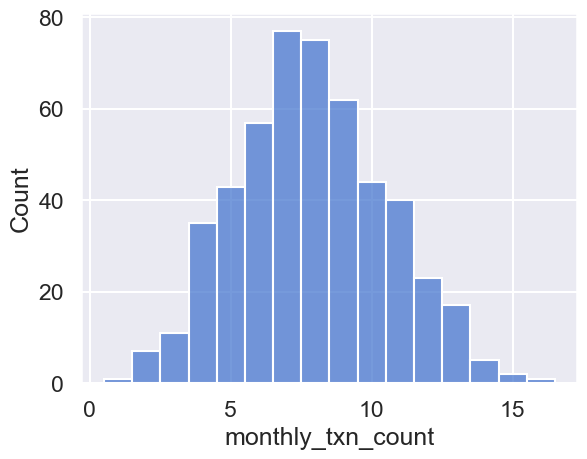

In [23]:
sns.histplot(df["monthly_txn_count"], bins=15, discrete=True)

<Axes: xlabel='avg_txn_value', ylabel='active_days'>

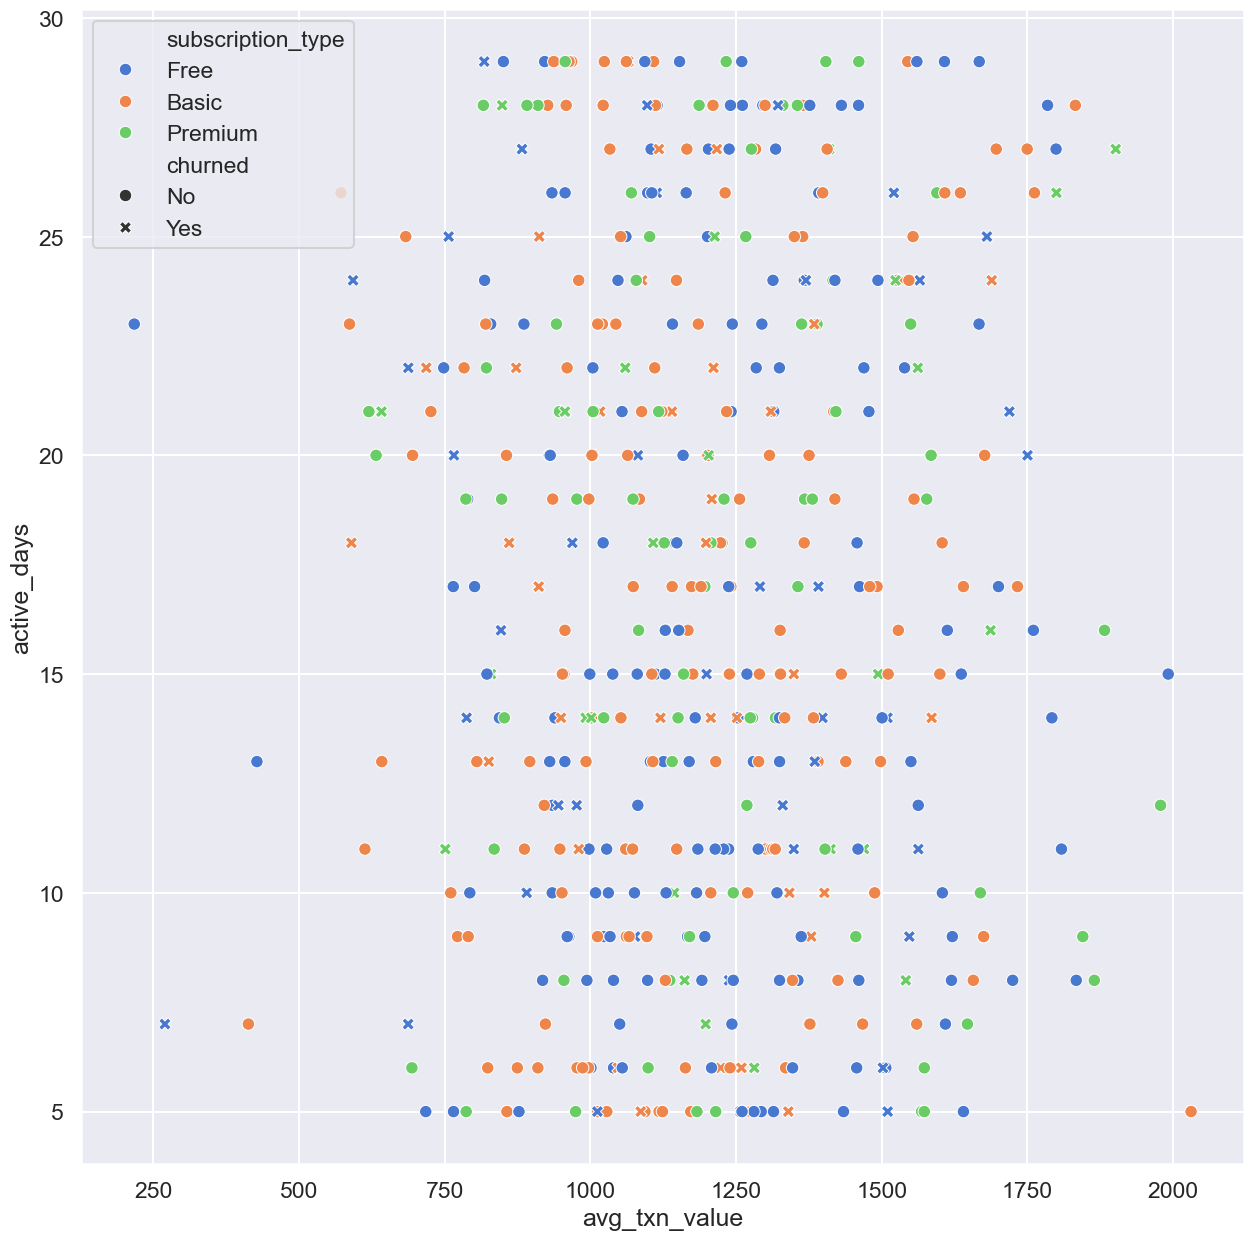

In [27]:
plt.figure(figsize=(15,15))
sns.scatterplot(x="avg_txn_value", y="active_days", hue="subscription_type", style="churned", data = df)

<Axes: xlabel='subscription_type', ylabel='avg_txn_value'>

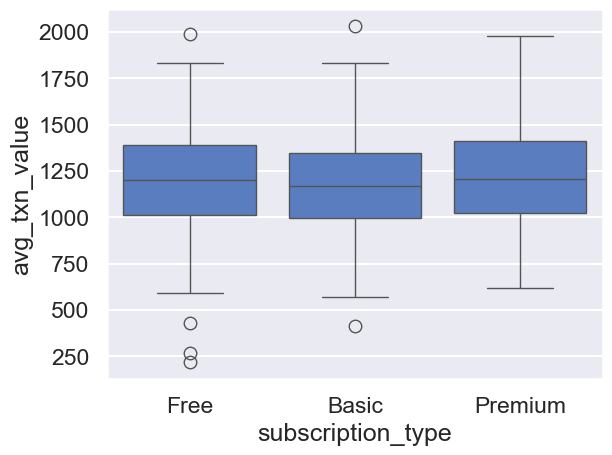

In [28]:
sns.boxplot(x="subscription_type", y="avg_txn_value", data=df, order=["Free", "Basic", "Premium"])

<Axes: xlabel='region', ylabel='monthly_txn_count'>

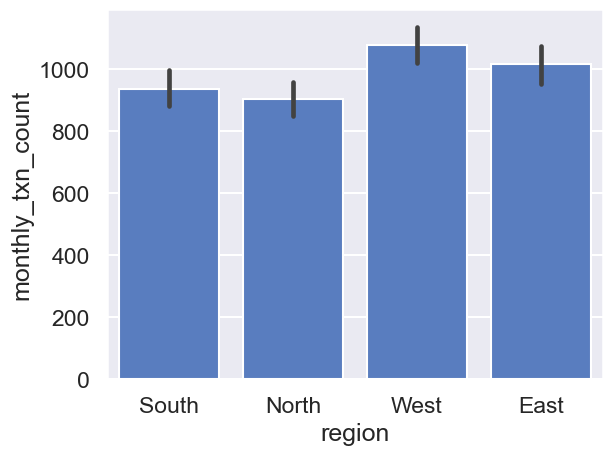

In [29]:
sns.barplot(x="region", y="monthly_txn_count", data=df, estimator=sum)

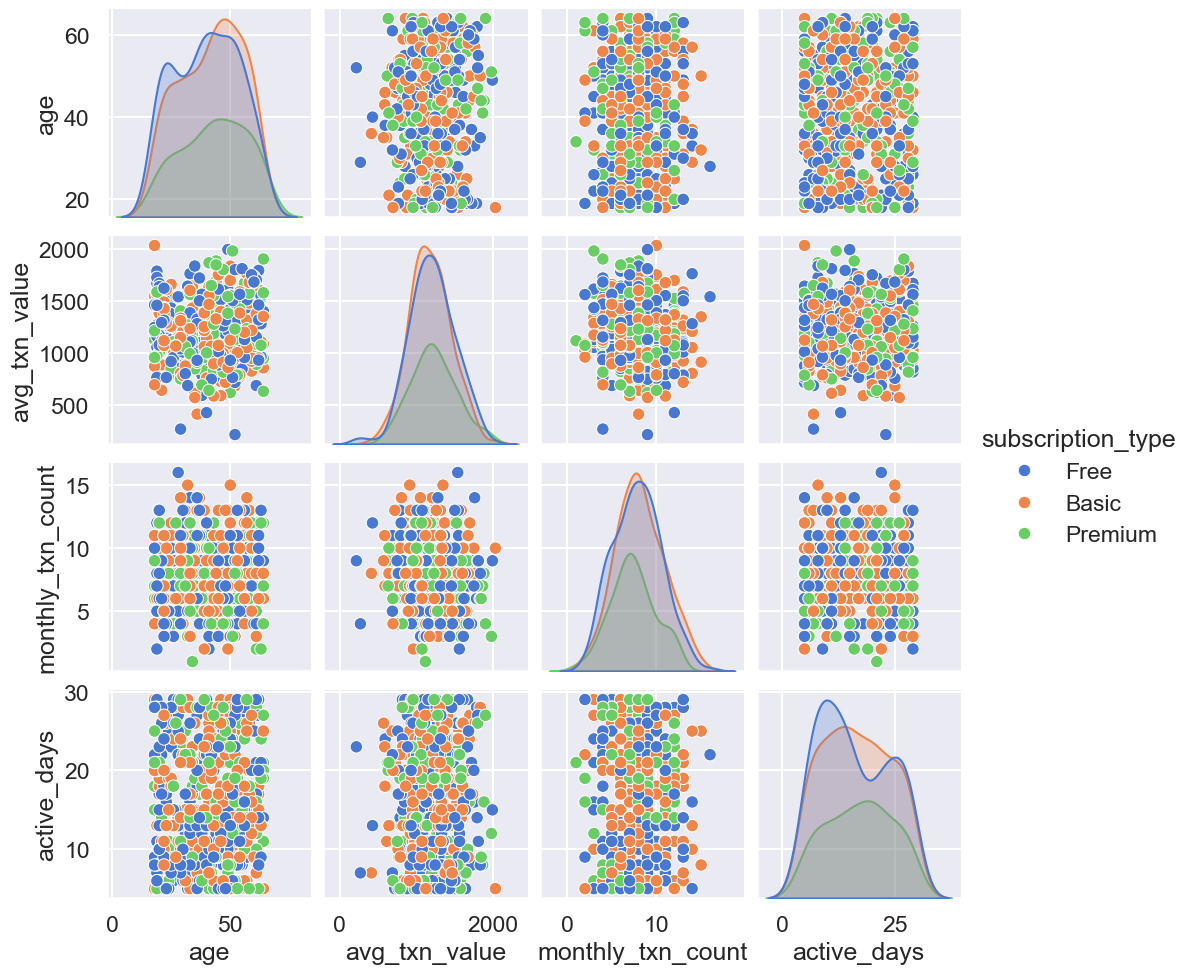

In [47]:
sns.pairplot(df[["age", "avg_txn_value", "monthly_txn_count", "active_days","subscription_type"]], hue='subscription_type')

<Axes: >

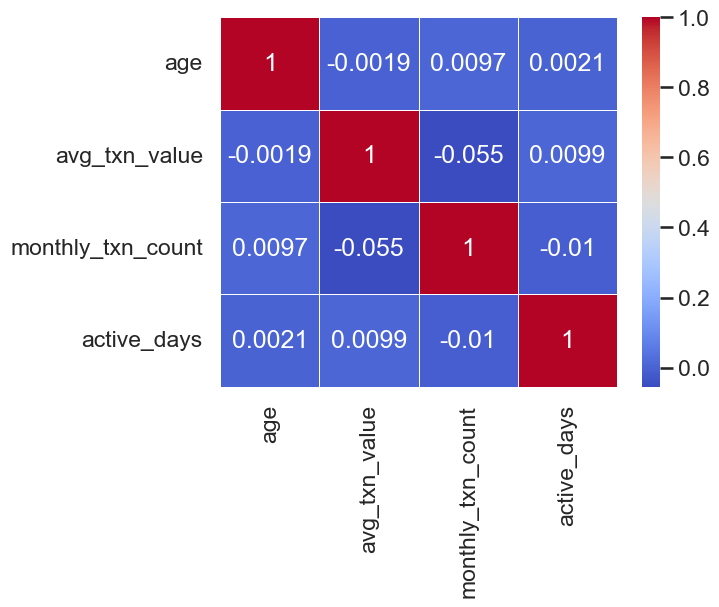

In [48]:
corr = df[["age", "avg_txn_value", "monthly_txn_count", "active_days"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)

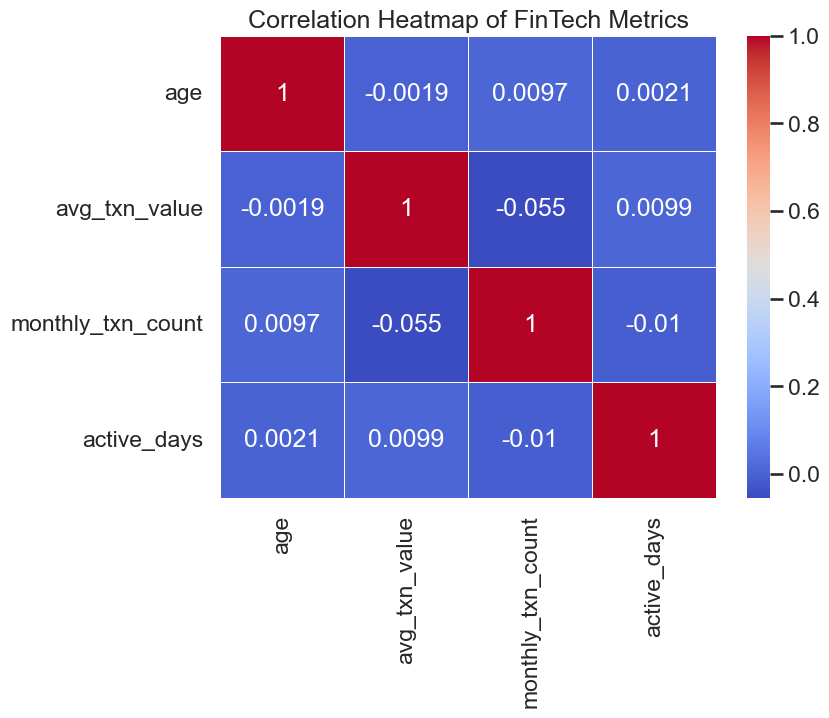

In [50]:
corr = df[["age", "avg_txn_value", "monthly_txn_count", "active_days"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of FinTech Metrics")
plt.show()

# 📈 Case Study: Analyzing Synthetic Stock Market Trends

## Step 1: Generate Synthetic Stock Market Data

In [51]:
import pandas as pd
import numpy as np

np.random.seed(42)
dates = pd.date_range(start="2022-01-01", end="2023-12-31", freq="D")
n = len(dates)

stocks = ["AlphaTech", "BetaCorp", "GammaIndustries"]
data = []

for stock in stocks:
    base_price = np.random.uniform(100, 500)
    noise = np.random.normal(0, 2, size=n)
    trend = np.linspace(0, 50, n)
    prices = base_price + trend + noise.cumsum()
    volumes = np.random.randint(1000, 10000, size=n)
    
    df = pd.DataFrame({
        "Date": dates,
        "Stock": stock,
        "Price": prices,
        "Volume": volumes
    })
    data.append(df)

df_stock = pd.concat(data)


## Exercise 1: Time Series Line Plot

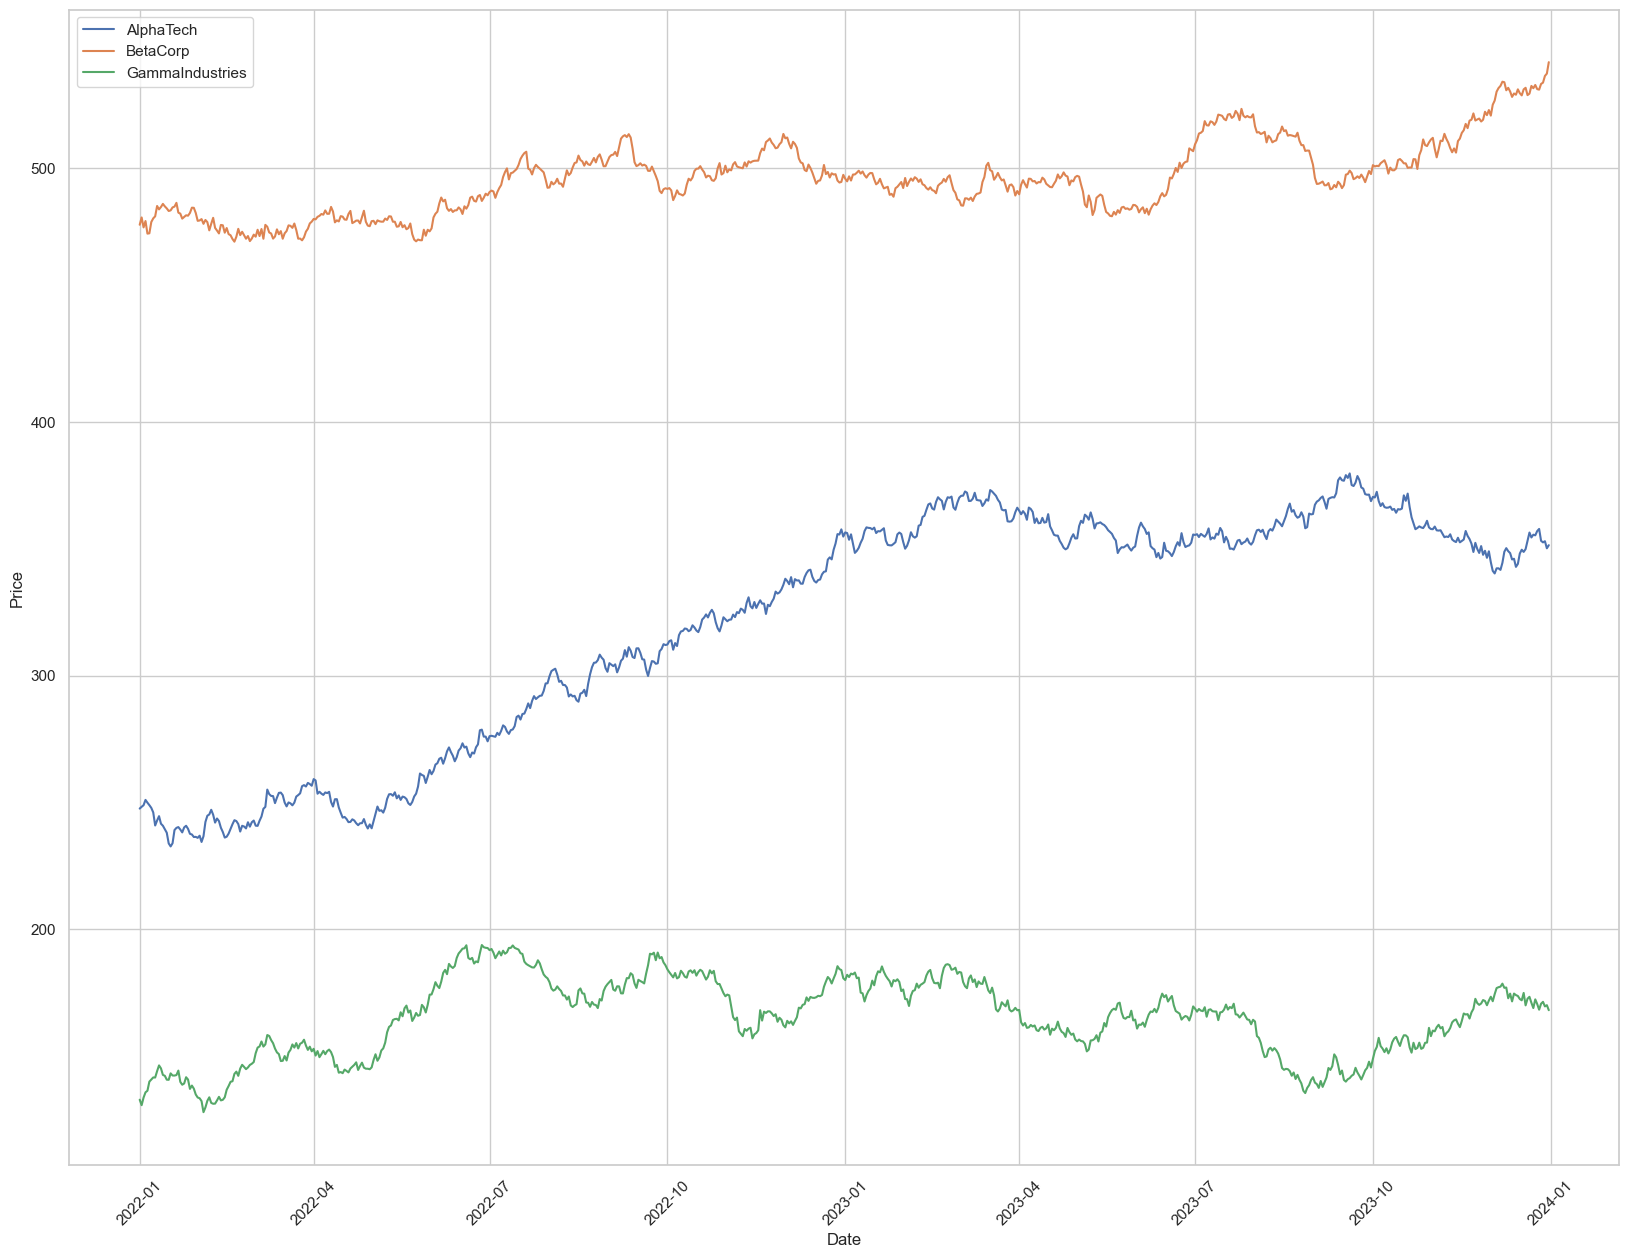

In [63]:
plt.figure(figsize=(20,15))
sns.lineplot(data=df_stock,x='Date',y='Price',hue='Stock')
plt.xticks(rotation=45)
plt.legend(loc='upper left')

## Exercise 2: Rolling Average & Volatility

In [153]:
df_stock_new = df_stock.set_index('Date')
df_stock_new['Rolling_Average_week'] = df_stock_new['Price'].rolling(window=7,min_periods=1).mean().round(2)
df_stock_new['Volatility_week'] = df_stock_new.groupby('Stock')['Volume'].transform(lambda x: (x.rolling(window=7,min_periods=1).var()/len(x)) ** 0.5)
df_stock_new['Rolling_Average_15'] = df_stock_new['Price'].rolling(window=15,min_periods=1).mean().round(2)
df_stock_new['Volatility_15'] = df_stock_new.groupby('Stock')['Volume'].transform(lambda x: (x.rolling(window=15,min_periods=1).var()/len(x)) ** 0.5)
df_stock_new['Rolling_Average_30'] = df_stock_new['Price'].rolling(window=30,min_periods=1).mean().round(2)
df_stock_new['Volatility_30'] = df_stock_new.groupby('Stock')['Volume'].transform(lambda x: (x.rolling(window=30,min_periods=1).var()/len(x)) ** 0.5)

In [154]:
df_stock1 = df_stock_new.reset_index().melt(id_vars=['Date','Stock'], value_vars=['Volatility_week', 'Rolling_Average_week'], var_name='Metric', value_name='Value')

In [155]:
df_stock1

,Date,Stock,Metric,Value
0,2022-01-01,AlphaTech,Volatility_week,NaN
1,2022-01-02,AlphaTech,Volatility_week,117.508671
2,2022-01-03,AlphaTech,Volatility_week,84.352151
3,2022-01-04,AlphaTech,Volatility_week,76.591790
4,2022-01-05,AlphaTech,Volatility_week,66.840654
...,...,...,...,...
4375,2023-12-27,GammaIndustries,Rolling_Average_week,170.780000
4376,2023-12-28,GammaIndustries,Rolling_Average_week,170.500000
4377,2023-12-29,GammaIndustries,Rolling_Average_week,170.290000
4378,2023-12-30,GammaIndustries,Rolling_Average_week,170.450000


<Axes: xlabel='Date', ylabel='Value'>

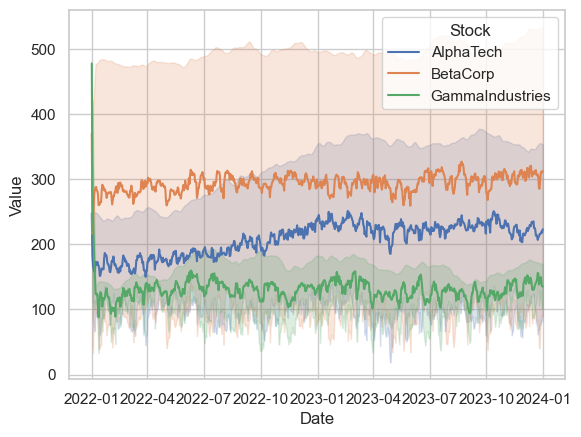

In [156]:
sns.lineplot(data=df_stock1, x='Date', y='Value', hue='Stock')

<Figure size 1000x1000 with 0 Axes>

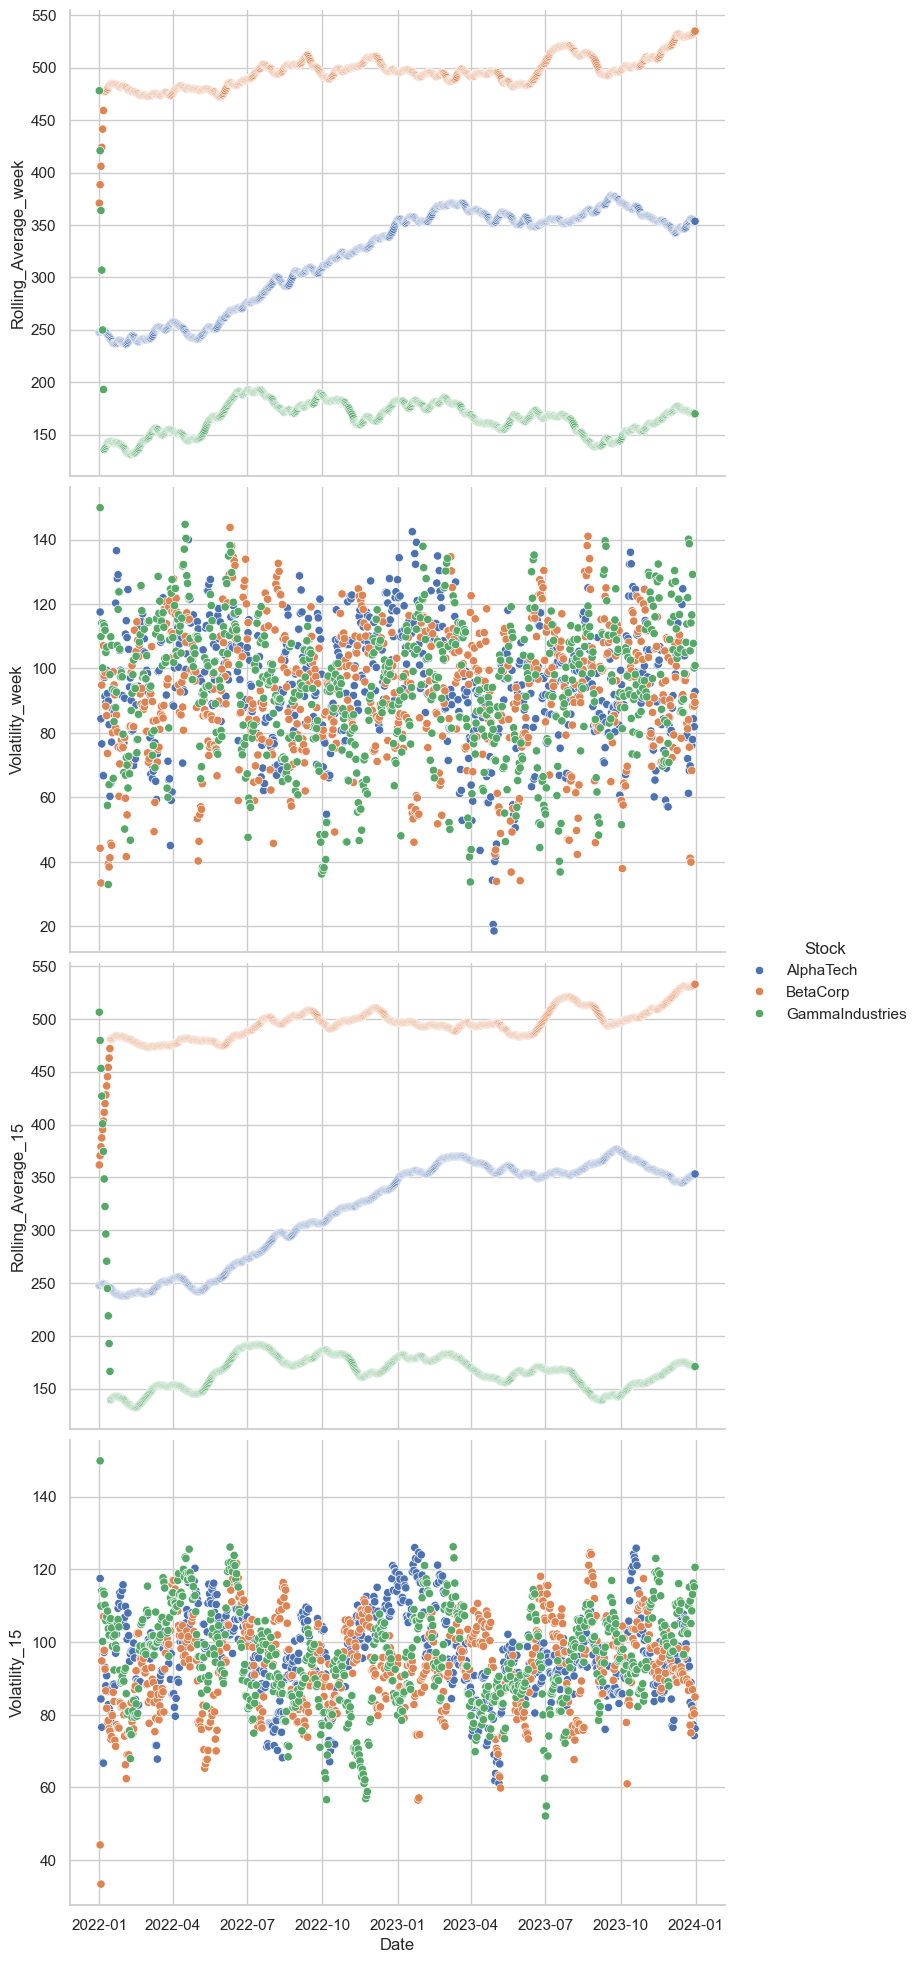

In [157]:
plt.figure(figsize=(10,10))
# ax1.set_ylabel(df_stock_new['Volatility'])
sns.pairplot(data=df_stock_new.reset_index(),x_vars='Date', y_vars=['Rolling_Average_week','Volatility_week','Rolling_Average_15','Volatility_15'], hue='Stock', height=5,aspect=1.5)

## Exercise 3: Box Plot for Monthly Volatility

<Axes: xlabel='Stock', ylabel='Volatility_30'>

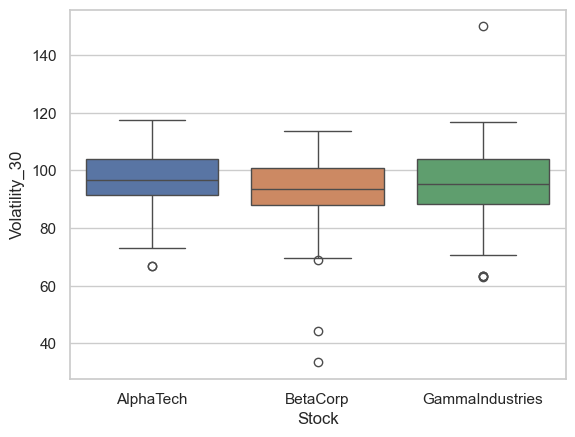

In [159]:
sns.boxplot(data=df_stock_new.reset_index(), x='Stock', y='Volatility_30',hue='Stock')

## Complex Excercise 

In [160]:
#🧪 Synthetic FinTech Dataset for Advanced Seaborn Exercises
import pandas as pd
import numpy as np

np.random.seed(42)
n = 500

df = pd.DataFrame({
    "user_id": np.arange(1, n+1),
    "age": np.random.randint(18, 65, size=n),  # Continuous
    "gender": np.random.choice(["Male", "Female", "Other"], size=n),  # Nominal
    "subscription_type": np.random.choice(["Free", "Basic", "Premium"], size=n, p=[0.4, 0.4, 0.2]),  # Ordinal
    "monthly_txn_count": np.random.poisson(lam=8, size=n),  # Discrete
    "avg_txn_value": np.round(np.random.normal(loc=1200, scale=300, size=n), 2),  # Continuous
    "region": np.random.choice(["North", "South", "East", "West"], size=n),  # Nominal
    "active_days": np.random.randint(5, 30, size=n),  # Discrete
    "churned": np.random.choice(["Yes", "No"], size=n, p=[0.2, 0.8])  # Nominal
})


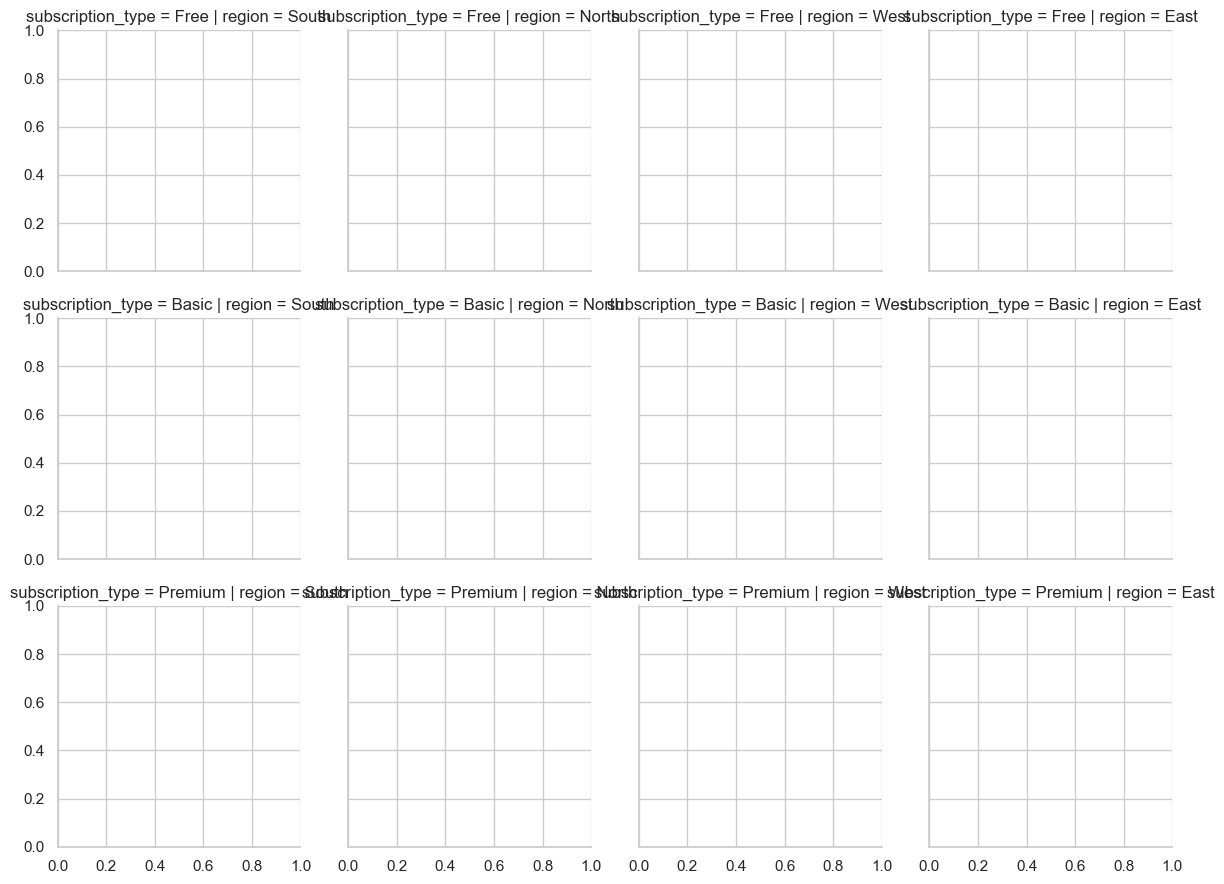

In [161]:
sns.FacetGrid(data=df, col='region', row='subscription_type')

In [ ]:
🧠 Exercise 1: PairGrid for Multivariate Exploration
Story:
You're analyzing customer segments for a FinTech app. You want to explore how age, transaction value, and activity vary across subscription tiers.
Why:
•	PairGrid lets you customize each subplot.
•	Diagonal shows distributions; off-diagonal shows relationships.
Insight:
Premium users cluster in high-value, high-activity zones—ideal for loyalty programs.
________________________________________
🎯 Exercise 2: FacetGrid with KDE and Categorical Conditioning
Story:
You’re investigating churn patterns across regions and subscription types.
Why:
•	FacetGrid breaks down data by multiple categories.
•	kdeplot reveals distribution shape.
Insight:
Churned users in the South show lower transaction values—targeted retention needed.
________________________________________
📦 Exercise 3: Swarm Plot with Box Overlay
Story:
You’re presenting user engagement across subscription tiers, highlighting both spread and central tendency.

Why:
•	swarmplot shows individual data points.
•	Overlaying on boxplot adds statistical context.
Insight:
Basic users show wide engagement spread—some highly active, some dormant.
________________________________________
🔍 Exercise 4: JointPlot with Regression
Story:
You’re exploring the relationship between transaction value and activity to predict churn.
Why:
•	jointplot combines scatter and regression.
•	hue adds segmentation.
Insight:
Churned users fall below the regression line—low activity despite spending.
________________________________________
🔥 Exercise 5: Clustermap for Behavioral Segmentation
Story:
You’re clustering users based on behavior to identify personas.
Why:
•	clustermap groups similar users.
•	standard_scale=1 normalizes columns.
Insight:
Three distinct clusters emerge—low spenders, high-frequency users, and balanced power users.